### S&P 500 Prediction by Time Series Analysis

In [176]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

In [177]:
# Oldest date is 1928-01-06 (Volume records since 1951-Dec-24)
SP = pd.read_csv('data/S&P500.csv')
SP['Date']= pd.to_datetime(SP['Date'])
SP['Year'] = SP['Date'].dt.year
SP['Month'] = SP['Date'].dt.month
SP['Day'] = SP['Date'].dt.day

# Manually converting 2027 ~ 2072 to Year 1927 ~ 1972 and combine 'Date' again
SP['Year'] = np.where((SP['Year'] >= 2027), SP['Year'] - 100, SP.Year)
SP['Date_adj'] = pd.to_datetime(SP[['Year','Month','Day']])
SP = SP.drop(['Date','Year','Month','Day'], axis=1)
SP = SP.rename(columns = {'Open':'S&P_Open','Close*':'S&P_Close','Volume':'S&P_Volume','Date_adj':'Date'})
SP = SP.set_index('Date')
SP.replace(to_replace=',', value='', inplace=True, regex = True)
SP.replace(to_replace='-', value=np.nan, inplace=True)

In [178]:
SP = SP.astype(float)

In [179]:
SP.head(5)

S&P_Open     High      Low  S&P_Close  Adj Close**    S&P_Volume
Date                                                                        
2022-09-02   3994.66  4018.43  3906.21    3924.26      3924.26  4.134920e+09
2022-09-01   3936.73  3970.23  3903.65    3966.85      3966.85  3.754570e+09
2022-08-31   4000.67  4015.37  3954.53    3955.00      3955.00  3.797860e+09
2022-08-30   4041.25  4044.98  3965.21    3986.16      3986.16  3.190580e+09
2022-08-29   4034.58  4062.99  4017.42    4030.61      4030.61  2.963020e+09

In [180]:
print('Dataset Shape: ',  SP.shape)

Dataset Shape:  (23783, 6)


#### Visualizing the Time Series Data

<AxesSubplot:title={'center':'S&P 500 Closing Price'}, xlabel='Date'>

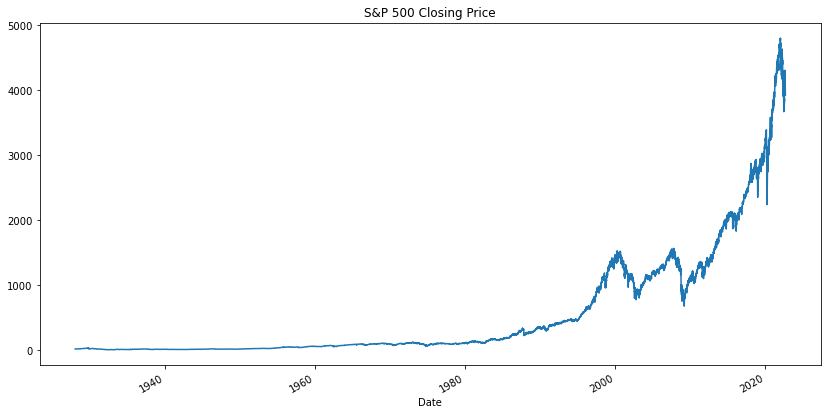

In [188]:
SP['S&P_Close'].plot(figsize=(14,7), title="S&P 500 Closing Price")

C:\Users\Irene\AppData\Local\Temp\ipykernel_1324\4145782129.py:1: FutureWarning:

Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.



<AxesSubplot:title={'center':'S&P 500 Closing Price'}, xlabel='Date'>

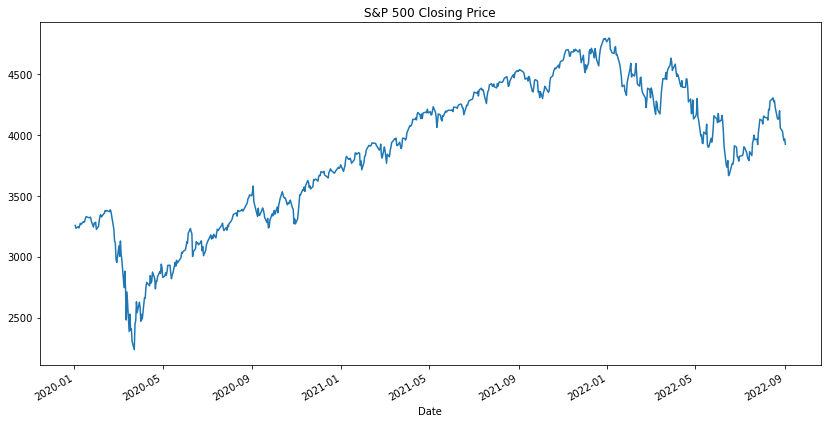

In [7]:
SP['S&P_Close']['2020-01-01':].plot(figsize=(14,7), title="S&P 500 Closing Price")

#### Handling Missing Values in Time Series Data

In [8]:
#calculating missing values in the dataset

missing_values = SP.isnull().sum()
missing_per = (missing_values/SP.shape[0])*100
missing_table = pd.concat([missing_values,missing_per], axis=1, ignore_index=True) 
missing_table.rename(columns={0:'Total Missing Values',1:'Missing %'}, inplace=True)
missing_table

Total Missing Values  Missing %
S&P_Open                        0   0.000000
High                            0   0.000000
Low                             0   0.000000
S&P_Close                       0   0.000000
Adj Close**                     0   0.000000
S&P_Volume                   5496  23.108943

In [9]:
SP.loc[:'1950-01-05', :]

S&P_Open   High    Low  S&P_Close  Adj Close**  S&P_Volume
Date                                                                  
1950-01-05     16.93  16.93  16.93      16.93        16.93   2550000.0
1950-01-04     16.85  16.85  16.85      16.85        16.85   1890000.0
1950-01-03     16.66  16.66  16.66      16.66        16.66   1260000.0
1949-12-30     16.79  16.79  16.79      16.79        16.79         NaN
1949-12-29     16.68  16.68  16.68      16.68        16.68         NaN
...              ...    ...    ...        ...          ...         ...
1928-01-06     17.66  17.66  17.66      17.66        17.66         NaN
1928-01-05     17.55  17.55  17.55      17.55        17.55         NaN
1928-01-04     17.72  17.72  17.72      17.72        17.72         NaN
1928-01-03     17.76  17.76  17.76      17.76        17.76         NaN
1927-12-30     17.66  17.66  17.66      17.66        17.66         NaN

[5499 rows x 6 columns]

In [10]:
SP['S&P_Volume'] = SP['S&P_Volume'].fillna(method='ffill')

In [11]:
SP.loc[:'1950-01-05', :]

S&P_Open   High    Low  S&P_Close  Adj Close**  S&P_Volume
Date                                                                  
1950-01-05     16.93  16.93  16.93      16.93        16.93   2550000.0
1950-01-04     16.85  16.85  16.85      16.85        16.85   1890000.0
1950-01-03     16.66  16.66  16.66      16.66        16.66   1260000.0
1949-12-30     16.79  16.79  16.79      16.79        16.79   1260000.0
1949-12-29     16.68  16.68  16.68      16.68        16.68   1260000.0
...              ...    ...    ...        ...          ...         ...
1928-01-06     17.66  17.66  17.66      17.66        17.66   1260000.0
1928-01-05     17.55  17.55  17.55      17.55        17.55   1260000.0
1928-01-04     17.72  17.72  17.72      17.72        17.72   1260000.0
1928-01-03     17.76  17.76  17.76      17.76        17.76   1260000.0
1927-12-30     17.66  17.66  17.66      17.66        17.66   1260000.0

[5499 rows x 6 columns]

### Exploratory Data Analysis

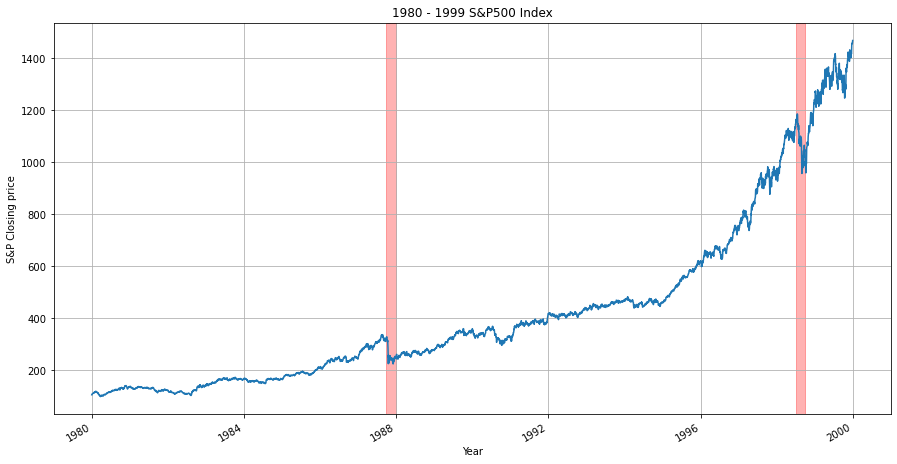

In [12]:
#Zooming in

ax = SP.loc['1980-01-03':'1999-12-31','S&P_Close'].plot(linestyle='-',figsize=(15,8), 
                                                        title="1980 - 1999 S&P500 Index", grid=True)
ax.set_xlabel('Year')
ax.set_ylabel('S&P Closing price')

ax.axvspan('1987-10-01','1987-12-31',color='red', alpha=0.3)
ax.axvspan('1998-07-01','1998-09-30',color='red', alpha=0.3)

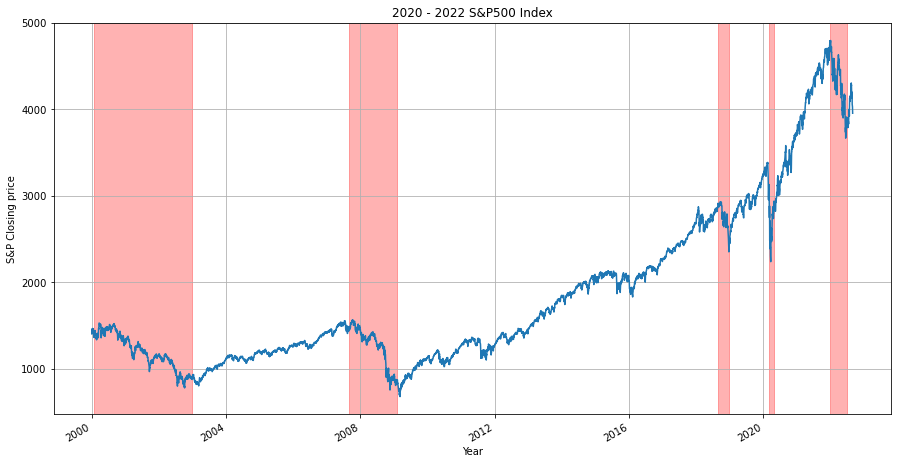

In [13]:
#Zooming in

ax = SP.loc['2000-01-03':'2022-08-31','S&P_Close'].plot(linestyle='-',figsize=(15,8), 
                                                        title="2020 - 2022 S&P500 Index", grid=True)
ax.set_xlabel('Year')
ax.set_ylabel('S&P Closing price')

ax.axvspan('2000-02-01','2002-12-31',color='red', alpha=0.3)
ax.axvspan('2007-09-01','2009-01-31',color='red', alpha=0.3)
ax.axvspan('2018-09-01','2018-12-30',color='red', alpha=0.3)
ax.axvspan('2020-03-01','2020-04-30',color='red', alpha=0.3)
ax.axvspan('2022-01-02','2022-06-30',color='red', alpha=0.3)

# Visualizing using Lag Plots

Lag plot are used to observe the autocorrelation. These are crucial when we try to correct the trend and stationarity and we have to use smoothing functions. Lag plot helps us to understand the data better.

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


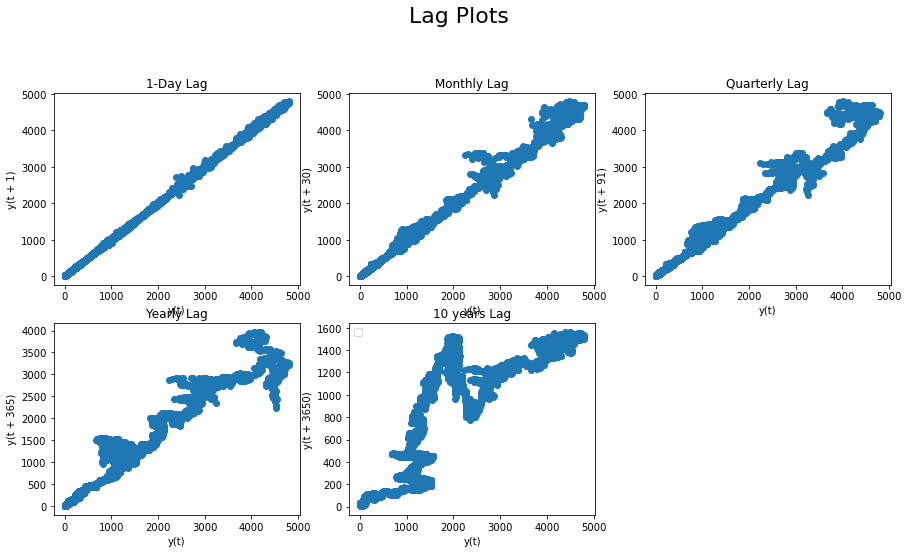

In [14]:
plt.figure(figsize=(15,12))
plt.suptitle('Lag Plots', fontsize=22)

plt.subplot(3,3,1)
pd.plotting.lag_plot(SP['S&P_Close'], lag=1) #day lag
plt.title('1-Day Lag')

plt.subplot(3,3,2)
pd.plotting.lag_plot(SP['S&P_Close'], lag=30) #monthly lag
plt.title('Monthly Lag')

plt.subplot(3,3,3)
pd.plotting.lag_plot(SP['S&P_Close'], lag=91) #quarterly lag
plt.title('Quarterly Lag')

plt.subplot(3,3,4)
pd.plotting.lag_plot(SP['S&P_Close'], lag=365) #yearly lag
plt.title('Yearly Lag')

plt.subplot(3,3,5)
pd.plotting.lag_plot(SP['S&P_Close'], lag=3650) #10years lag
plt.title('10 years Lag')

plt.legend()
plt.show()

We can see that there is a positive correlation for daily, monthly and quarterly lag plots. We observe less correlation for 10 years lag plots.

It makes sense to re-sample our data atmost at the Monthly level, thereby preserving the autocorrelation as well. 

In [15]:
monthly_data = SP.resample('1M').mean()
monthly_data = monthly_data.reset_index()
monthly_data.set_index('Date', inplace=True)
monthly_data

S&P_Open         High          Low    S&P_Close  Adj Close**  \
Date                                                                          
1927-12-31    17.660000    17.660000    17.660000    17.660000    17.660000   
1928-01-31    17.520000    17.520000    17.520000    17.520000    17.520000   
1928-02-29    17.324211    17.324211    17.324211    17.324211    17.324211   
1928-03-31    18.233182    18.233182    18.233182    18.233182    18.233182   
1928-04-30    19.371000    19.371000    19.371000    19.371000    19.371000   
...                 ...          ...          ...          ...          ...   
2022-05-31  4037.780000  4082.188095  3986.214286  4040.360000  4040.360000   
2022-06-30  3908.924286  3942.405238  3864.070000  3898.946667  3898.946667   
2022-07-31  3893.241000  3931.058000  3866.241000  3911.729500  3911.729500   
2022-08-31  4164.375652  4189.813043  4136.988261  4158.563043  4158.563043   
2022-09-30  3965.695000  3994.330000  3904.930000  3945.555000  3945.555000   

              S&P_Volume  
Date                      
1927-12-31  1.260000e+06  
1928-01-31  1.260000e+06  
1928-02-29  1.260000e+06  
1928-03-31  1.260000e+06  
1928-04-30  1.260000e+06  
...                  ...  
2022-05-31  4.244197e+09  
2022-06-30  4.133289e+09  
2022-07-31  3.401057e+09  
2022-08-31  3.395153e+09  
2022-09-30  3.944745e+09  

[1138 rows x 6 columns]

# Plotting using Plotly

Plotly allows us to make interactve charts which are pretty useful in financial analysis. 

* The **range-sliders** can be used to zoom-in and zoom-out.
* The **range-selectors** can be used to select the range.

In [16]:
import plotly.express as px

fig = px.line(monthly_data, x=monthly_data.index, y='S&P_Close', title='S&P_Close')
fig.update_layout(hovermode="x")

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="2y", step="year", stepmode="backward"),
            dict(step="all")
            
        ])
    )
)
fig.show()

In [17]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Candlestick(x= monthly_data.index,
                    open=monthly_data['S&P_Open'],
                    high=monthly_data['High'],
                    low=monthly_data['Low'],
                    close=monthly_data['S&P_Close']))
fig.show()

# Time Series Decomposition & Statistical Tests

We can decompose a time series into trend, seasonal amd remainder components, as mentioned in the earlier section. The series can be decomposed as an additive or multiplicative combination of the base level, trend, seasonal index and the residual.
The seasonal_decompose in statsmodels is used to implements the decomposition.

We will then perform some statistical tests like [KPSS](http://en.wikipedia.org/wiki/KPSS_test) and [Augmented Dickey–Fuller](http://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) tests to check stationarity. 

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

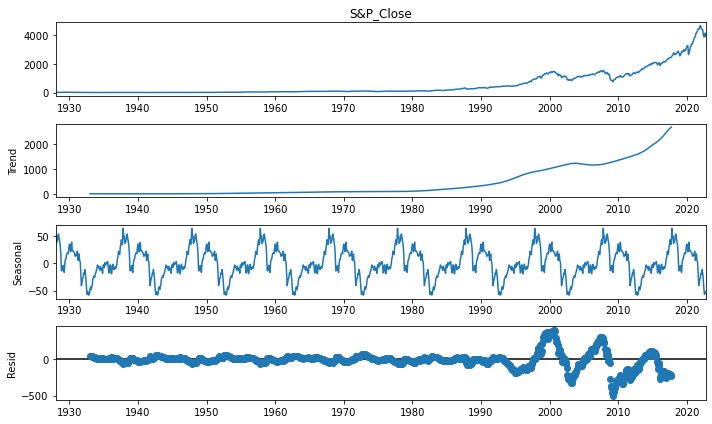

<Figure size 1080x864 with 0 Axes>

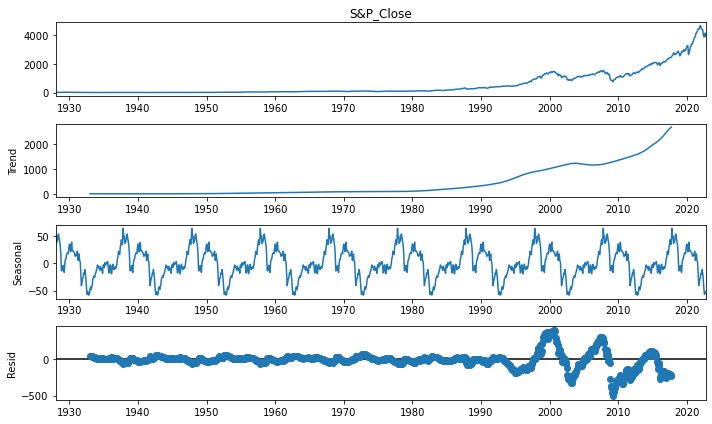

In [19]:
plt.figure(figsize=(15,12))
series = monthly_data['S&P_Close']
result = seasonal_decompose(series, model='additive',period=120)
result.plot()

Post time series decomposition we don't observe any seasonality. Also, there is no constant mean, variance and covariance, hence the series is Non Stationary. We will perform statistical tests like KPSS and ADF to confirm our understanding.

But first, let's plot ACF and PACF graphs.

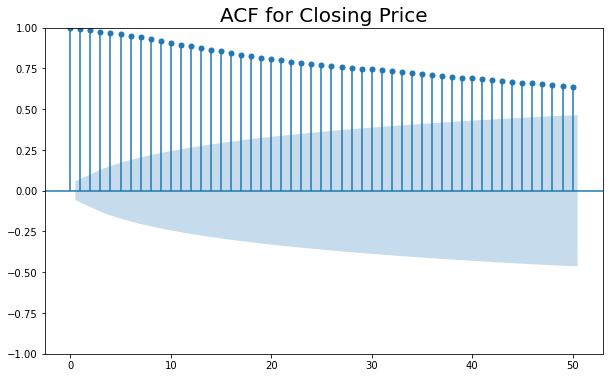

In [20]:
#ACF - Autocorrelation 
acf = plot_acf(series, lags=50, alpha=0.05)
plt.title("ACF for Closing Price", size=20)
plt.show()

The above graph shows that effect barely detoriate over time, so past values affect the present ones. The more lags we include, the better our model will fit the dataset, now the risk is coefficients might predict the dataset too well, cause an overfitting.
In our model, we always try to include only those lags which have a direct effect on our present value. Hence, let's try PACF.

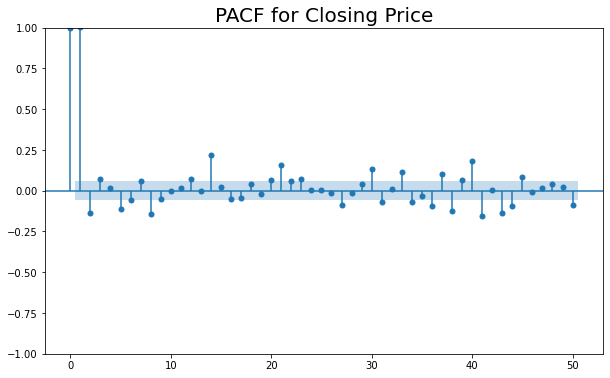

In [21]:
#PACF - Partial Auto Correlation
plot_pacf(series, lags=50, alpha=0.05, method='ols')
plt.title("PACF for Closing Price", size=20)
plt.show()

# ADF Test

The only difference here is the Null hypothesis which is just opposite of KPSS.

The null hypothesis of the test is the presence of **unit root**, that is, the series is **non-stationary**.

In [22]:
def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print (dfoutput)
    

    if p > 0.05: ('Series is not Stationary')
    else: ('Series is Stationary')

In [23]:
adf_test(series)

Results of Dickey-Fuller Test:
Test Statistic                    4.124818
p-value                           1.000000
#Lags Used                       22.000000
Number of Observations Used    1115.000000
Critical Value (1%)              -3.436228
Critical Value (5%)              -2.864136
Critical Value (10%)             -2.568152
dtype: float64


# Conclusion


ADF says series is not stationary. We will use **differencing** to make series stationary.

### Data Transformation to achieve Stationarity
1. Log Scale Transformation 

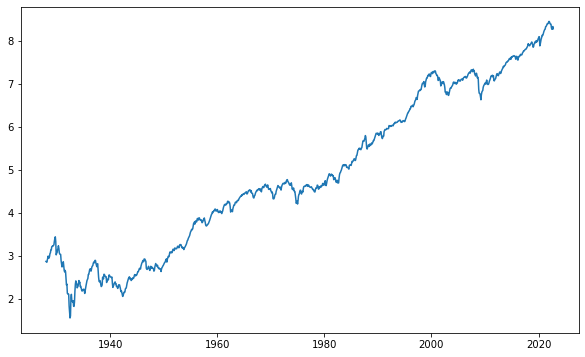

In [24]:
#Estimating trend
series_logScale = np.log(series)
plt.plot(series_logScale)

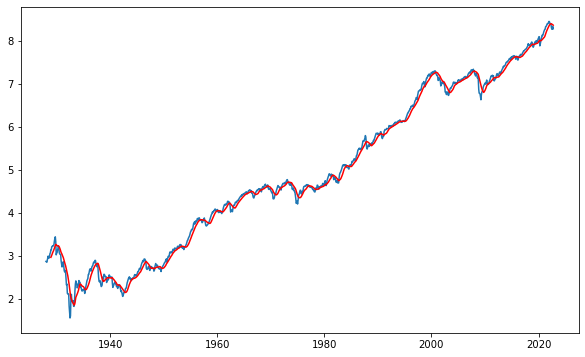

In [25]:
#The below transformation is required to make series stationary
movingAverage = series_logScale.rolling(window=12).mean()
movingSTD = series_logScale.rolling(window=12).std()
plt.plot(series_logScale)
plt.plot(movingAverage, color='red')

In [26]:
LogScale_MA = series_logScale - movingAverage
LogScale_MA.head(12)

#Remove NAN values
LogScale_MA.dropna(inplace=True)
LogScale_MA.head(10)

Date
1928-11-30    0.173409
1928-12-31    0.152839
1929-01-31    0.195367
1929-02-28    0.169952
1929-03-31    0.158507
1929-04-30    0.131153
1929-05-31    0.123969
1929-06-30    0.118048
1929-07-31    0.169870
1929-08-31    0.191514
Name: S&P_Close, dtype: float64

In [27]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

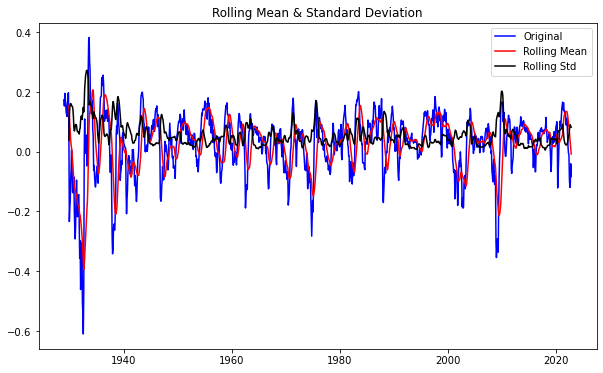

Results of Dickey Fuller Test:
Test Statistic                -6.177120e+00
p-value                        6.589383e-08
#Lags Used                     2.100000e+01
Number of Observations Used    1.105000e+03
Critical Value (1%)           -3.436282e+00
Critical Value (5%)           -2.864159e+00
Critical Value (10%)          -2.568165e+00
dtype: float64


In [28]:
test_stationarity(LogScale_MA)

### 2. Time Shift Transformation

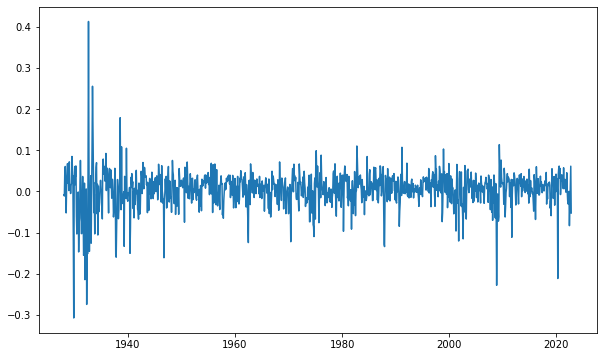

In [29]:
LogDiffShifting = series_logScale - series_logScale.shift()
plt.plot(LogDiffShifting)

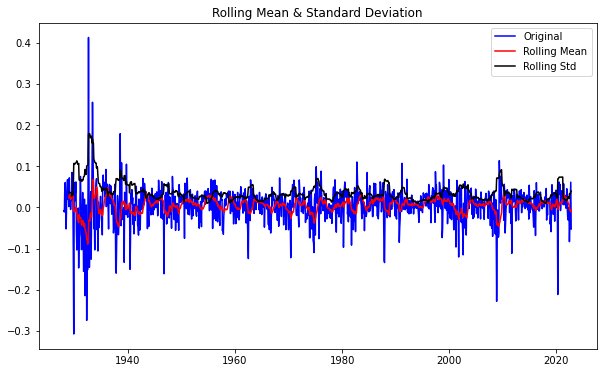

Results of Dickey Fuller Test:
Test Statistic                -8.397342e+00
p-value                        2.280154e-13
#Lags Used                     2.000000e+01
Number of Observations Used    1.116000e+03
Critical Value (1%)           -3.436223e+00
Critical Value (5%)           -2.864133e+00
Critical Value (10%)          -2.568151e+00
dtype: float64


In [30]:
LogDiffShifting.dropna(inplace=True)
test_stationarity(LogDiffShifting)

Let us now break down the 3 components of the log scale series using a system libary function. Once, we separate our the components, we can simply ignore trend & seasonality and check on the nature of the residual part.

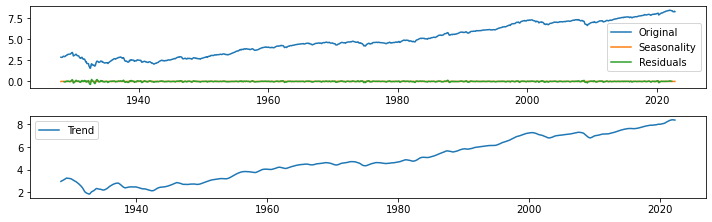

In [31]:
decomposition = seasonal_decompose(series_logScale) 

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(series_logScale, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')

plt.subplot(411)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

plt.tight_layout()


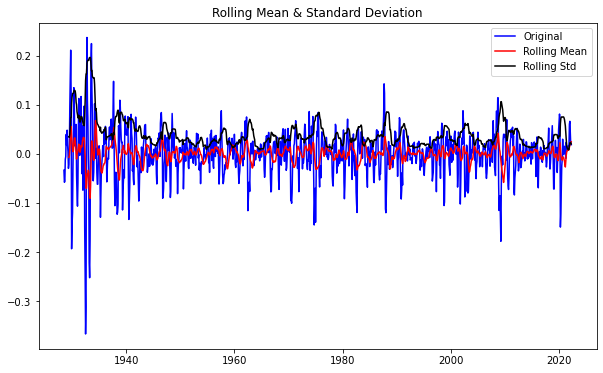

Results of Dickey Fuller Test:
Test Statistic                -1.089362e+01
p-value                        1.207631e-19
#Lags Used                     2.200000e+01
Number of Observations Used    1.103000e+03
Critical Value (1%)           -3.436293e+00
Critical Value (5%)           -2.864164e+00
Critical Value (10%)          -2.568167e+00
dtype: float64


In [32]:

#there can be cases where an observation simply consisted of trend & seasonality. In that case, there won't be 
#any residual component & that would be a null or NaN. Hence, we also remove such cases.
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

Plotting ACF & PACF 

LogDiffShifting

LogDiffShifting

In [33]:
type(LogDiffShifting.values)

numpy.ndarray

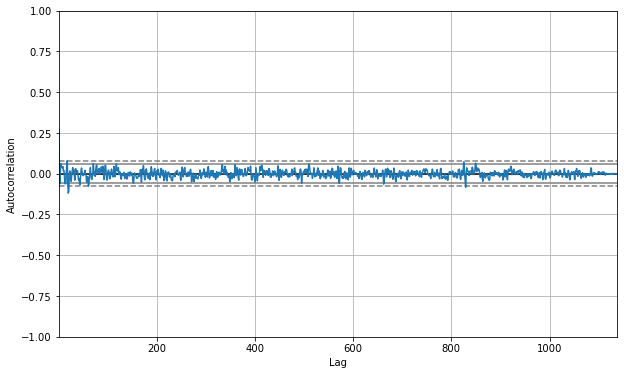

In [34]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(LogDiffShifting.values)
plt.show()

#ACF & PACF plots
'''
#Plot ACF:
lag_acf = acf(LogDiffShifting)
#plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(LogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(LogDiffShifting)), linestyle='--', color='gray')
plt.title('Autocorrelation Function')            '''

#Plot PACF
lag_pacf = pacf(LogDiffShifting.values, nlags=20, method='ols')
#plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(LogDiffShifting)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(LogDiffShifting)), linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()            

### Building a Model

# AR+I+MA = ARIMA model
model = ARIMA(series_logScale, order=(2,1,0))
results_ARIMA = model.fit()
plt.plot(LogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
print('Plotting ARIMA model')

In [35]:
# differencing
series_logScale_diff = series_logScale - series_logScale.shift(1)

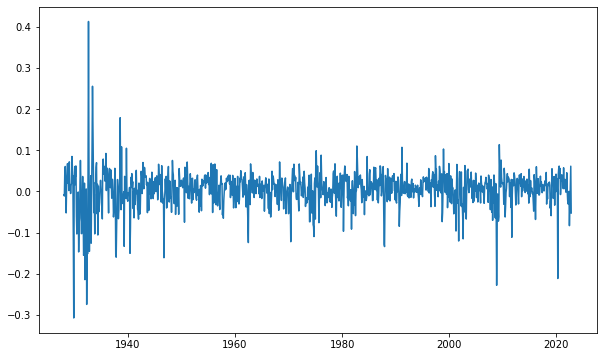

In [36]:
stationary_series = series_logScale_diff.dropna()
plt.plot(stationary_series)
plt.show()

#### Use the stationary time series and find the optimal `(p, d, q)` parameters of ARIMA model.

Plotting ACF & PACF

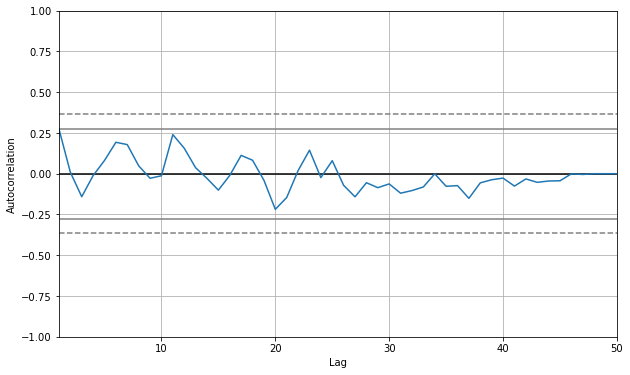

In [37]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(stationary_series[:50])
plt.show()

C:\Users\Irene\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning:

The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.



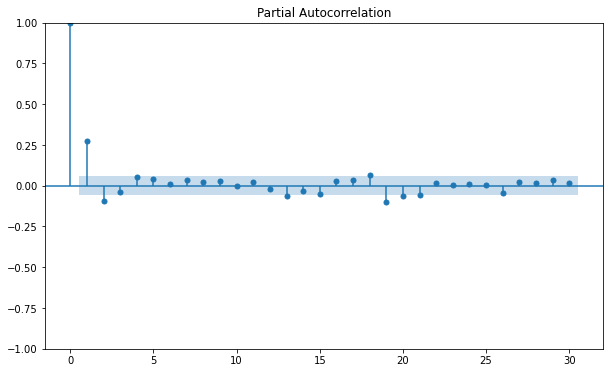

In [38]:
plot_pacf(stationary_series, lags=30)
plt.show()

From the ACF graph, we see that curve touches y=0.0 line at x=16. Thus, from theory, Q = 16 (will use 10 only for highly correlated lags). From the PACF graph, we see that curve touches y=0.0 line at x=2. Thus, from theory, P = 2

ARIMA is AR + I + MA. Before, we see an ARIMA model, let us check the results of the individual AR & MA model. Note that, these models will give a value of RSS. Lower RSS values indicate a better model.

# ARIMA Model

ARIMA is an acronym that stands for AutoRegressive Integrated Moving Average. It is a class of model that captures a suite of different standard temporal structures in time series data.This acronym is descriptive, capturing the key aspects of the model itself. Briefly, they are:

* **AR: Autoregression** A model that uses the dependent relationship between an observation and some number of lagged observations.
* **I: Integrated** The use of differencing of raw observations (e.g. subtracting an observation from an observation at the previous time step) in order to make the time series stationary.
* **MA: Moving Average** A model that uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

A standard notation is used of ARIMA(p,d,q) where the parameters are substituted with integer values to quickly indicate the specific ARIMA model being used.

* **p**: The number of lag observations included in the model, also called the lag order.
* **d**: The number of times that the raw observations are differenced, also called the degree of dfferencing.
* **q**: The size of the moving average window, also called the order of moving average.

Happy further reading [here](http://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average)

In [125]:
df = series_logScale # it should be non-stationary data before differencing because ARIMA model does the differencing. 


In [126]:
df_train = df[df.index < "2018"]
df_valid = df[df.index >= "2018"]

print('train shape :', df_train.shape)
print('validation shape :', df_valid.shape)

train shape : (1081,)
validation shape : (57,)


In [127]:
import pmdarima as pm

In [128]:
model = pm.auto_arima(df_train, trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train)

forecast = model.predict(n_periods=len(df_valid))
df_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-3727.357, Time=0.91 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-3631.413, Time=0.10 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-3719.546, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-3726.097, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-3621.947, Time=0.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-3724.885, Time=0.59 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-3725.997, Time=0.67 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-3726.017, Time=0.97 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-3724.935, Time=0.91 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-3724.827, Time=0.40 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-3723.459, Time=0.41 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-3725.189, Time=0.29 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=-3722.947, Time=0.36 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-3721.350, Time=0.53 sec

Best model:  ARIMA

C:\Users\Irene\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Irene\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.

C:\Users\Irene\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency M will be used.



                               SARIMAX Results                                
Dep. Variable:              S&P_Close   No. Observations:                 1081
Model:                 ARIMA(2, 1, 2)   Log Likelihood                1865.675
Date:                Mon, 12 Sep 2022   AIC                          -3721.350
Time:                        17:17:55   BIC                          -3696.426
Sample:                    12-31-1927   HQIC                         -3711.912
                         - 12-31-2017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0411      0.174      0.237      0.813      -0.299       0.382
ar.L2         -0.2429      0.078     -3.100      0.002      -0.396      -0.089
ma.L1          0.2720      0.180      1.511      0.1

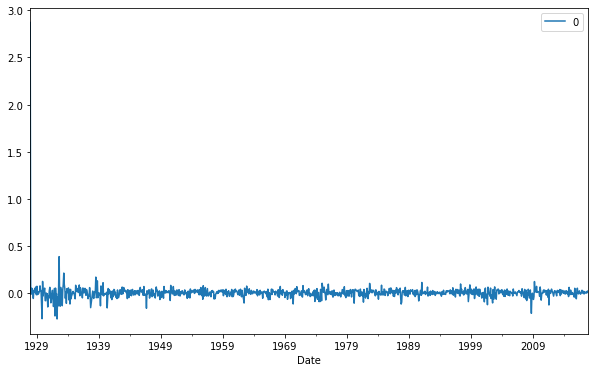

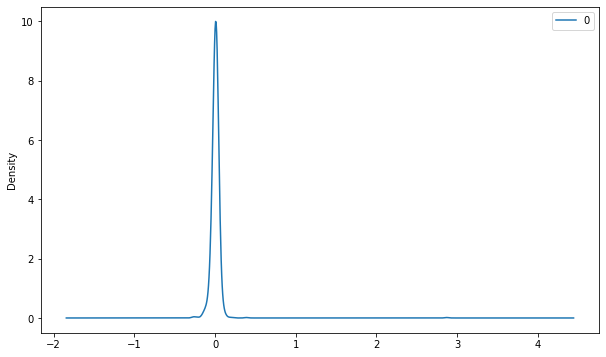

                 0
count  1081.000000
mean      0.006320
std       0.097175
min      -0.271937
25%      -0.014950
50%       0.007209
75%       0.026549
max       2.871302


In [131]:
# fit an ARIMA model and plot residual errors

from pandas import DataFrame
from statsmodels.tsa.arima.model import ARIMA

# fit model
model = ARIMA(df_train, order=(2,1,2))
model_fit = model.fit()
# summary of fit model
print(model_fit.summary())
# line plot of residuals
residuals = DataFrame(model_fit.resid)
residuals.plot()
plt.show()
# density plot of residuals
residuals.plot(kind='kde')
plt.show()
# summary stats of residuals
print(residuals.describe())


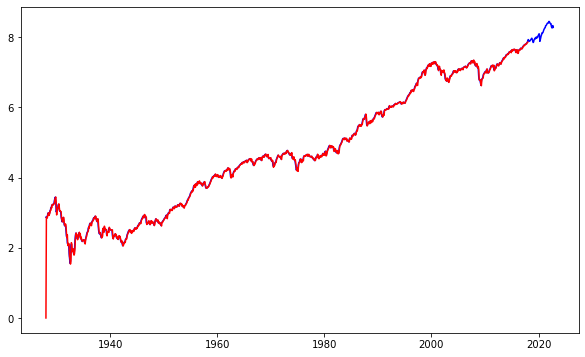

Plotting ARIMA model


In [132]:
plt.plot(series_logScale, color='blue')
plt.plot(model_fit.fittedvalues, color='red')
plt.show()
print('Plotting ARIMA model')

### Building a Model

#### Prediction & Reverse transformations

predictions_ARIMA_diff = pd.Series(model_fit.fittedvalues, copy=True)
print(predictions_ARIMA_diff.head())

#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum)

predictions_ARIMA_log = pd.Series(series_logScale, index=series_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

# Inverse of log is exp.
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(series, color='blue')
plt.plot(predictions_ARIMA, color='red')

In [133]:
valid_pred = model_fit.predict(start='2018-01-31', end='2022-08-31') 

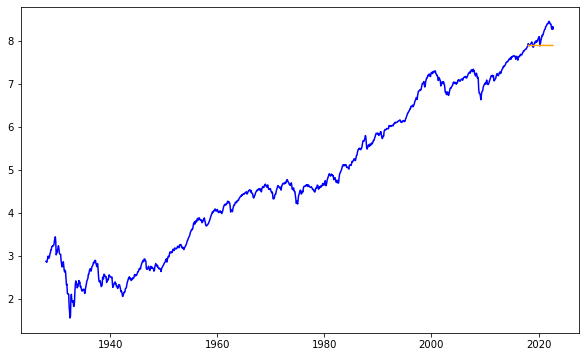

In [135]:
plt.plot(series_logScale, color='blue')
#plt.plot(model_fit.fittedvalues, color='red')
plt.plot(valid_pred, color='orange')

`The model is not performing well.`


# FB Prophet

In [137]:
# Load FB Prophet
from prophet import Prophet

In [138]:
SP_daily_fb = SP.reset_index()[['Date','S&P_Close']].rename({'Date':'ds','S&P_Close':'y'}, axis=1)

In [139]:
SP_daily_fb = SP_daily_fb.sort_values('ds', ascending=True, ignore_index=True)
SP_daily_fb = SP_daily_fb.loc[SP_daily_fb['ds']>='1986-01-01']

In [140]:
split_date = "2018-01-01"
train_filt = SP_daily_fb['ds'] <= split_date
test_filt = SP_daily_fb['ds'] > split_date

train_fb = SP_daily_fb[train_filt]
test_fb = SP_daily_fb[test_filt]

In [141]:
print("train data shape :", train_fb.shape)
print("test data shape :", test_fb.shape)

train data shape : (8067, 2)
test data shape : (1177, 2)


In [142]:
# Setup and train model and fit
model = Prophet(interval_width=0.95, daily_seasonality=False)
model.add_seasonality(name='yearly',period=250, fourier_order=5)
model.fit(SP_daily_fb)


INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:cmdstanpy:start chain 1
INFO:cmdstanpy:finish chain 1


In [143]:
#Forcast into the future
future = model.make_future_dataframe(periods=1200)

forecast = model.predict(future)
forecast.head()[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds        yhat  yhat_lower  yhat_upper
0 1986-01-02  237.635299  -41.992624  518.590218
1 1986-01-03  236.815044  -41.809901  502.950103
2 1986-01-06  237.258128  -39.079377  495.209805
3 1986-01-07  238.214829  -44.676772  498.821318
4 1986-01-08  238.609557  -40.323607  518.384680

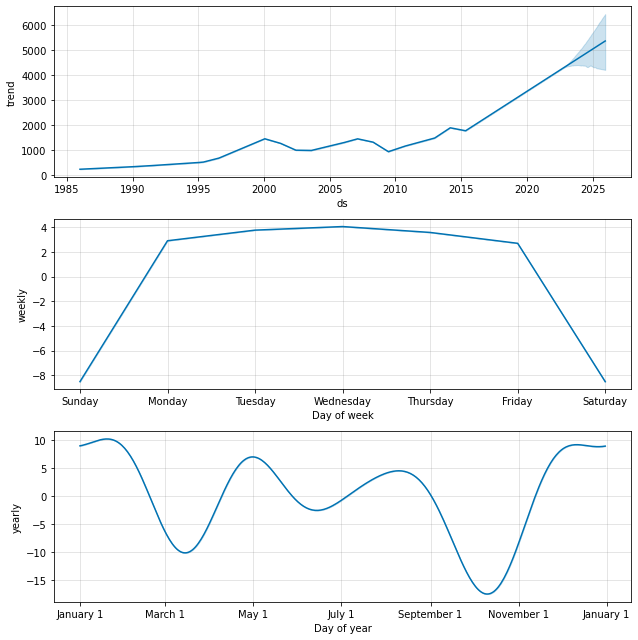

In [144]:
# Plot the components of the model
fig = model.plot_components(forecast)

Compare Forecast to Actuals

"f, ax = plt.subplots(1)\nf.set_figheight(5)\nf.set_figwidth(15)\nax.scatter(test_fb.index, test_fb, color='r')\nfig = model.plot(forecast, ax=ax)"

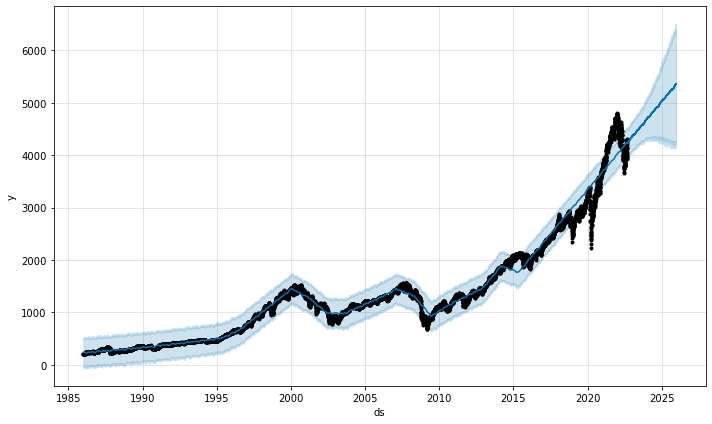

In [190]:
# Plot the forecast with the actuals
fig = model.plot(forecast)
'''f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test_fb.index, test_fb, color='r')
fig = model.plot(forecast, ax=ax)'''

In [198]:
thisyear = forecast.loc[(forecast['ds'] > '2022-10-01') & (forecast['ds'] < '2022-12-31')]

In [199]:
thisyear = thisyear.set_index('ds')

In [200]:
thisyear

trend   yhat_lower   yhat_upper  trend_lower  trend_upper  \
ds                                                                            
2022-10-02  4268.104563  3958.738668  4529.440727  4267.546585  4268.104563   
2022-10-03  4269.029621  3983.496483  4545.910780  4268.383449  4269.029621   
2022-10-04  4269.954678  3990.277850  4525.644948  4269.224671  4269.954678   
2022-10-05  4270.879735  3981.417838  4516.930490  4269.955474  4270.882856   
2022-10-06  4271.804793  4002.239350  4524.358033  4270.800051  4271.844873   
...                 ...          ...          ...          ...          ...   
2022-12-26  4346.734441  4091.970243  4652.398385  4321.472635  4373.846333   
2022-12-27  4347.659498  4077.792058  4645.166451  4322.115043  4375.293398   
2022-12-28  4348.584555  4069.730660  4653.028282  4322.761549  4376.740463   
2022-12-29  4349.509613  4093.906966  4618.040753  4323.420751  4378.187528   
2022-12-30  4350.434670  4075.617804  4626.211241  4324.079954  4379.634593   

            additive_terms  additive_terms_lower  additive_terms_upper  \
ds                                                                       
2022-10-02      -24.964891            -24.964891            -24.964891   
2022-10-03      -13.801103            -13.801103            -13.801103   
2022-10-04      -13.173427            -13.173427            -13.173427   
2022-10-05      -13.077619            -13.077619            -13.077619   
2022-10-06      -13.711250            -13.711250            -13.711250   
...                    ...                   ...                   ...   
2022-12-26       11.766676             11.766676             11.766676   
2022-12-27       12.640365             12.640365             12.640365   
2022-12-28       12.952057             12.952057             12.952057   
2022-12-29       12.503104             12.503104             12.503104   
2022-12-30       11.658587             11.658587             11.658587   

              weekly  weekly_lower  weekly_upper     yearly  yearly_lower  \
ds                                                                          
2022-10-02 -8.521990     -8.521990     -8.521990 -16.442901    -16.442901   
2022-10-03  2.912855      2.912855      2.912855 -16.713958    -16.713958   
2022-10-04  3.774289      3.774289      3.774289 -16.947716    -16.947716   
2022-10-05  4.065239      4.065239      4.065239 -17.142858    -17.142858   
2022-10-06  3.586968      3.586968      3.586968 -17.298218    -17.298218   
...              ...           ...           ...        ...           ...   
2022-12-26  2.912855      2.912855      2.912855   8.853821      8.853821   
2022-12-27  3.774289      3.774289      3.774289   8.866076      8.866076   
2022-12-28  4.065239      4.065239      4.065239   8.886818      8.886818   
2022-12-29  3.586968      3.586968      3.586968   8.916136      8.916136   
2022-12-30  2.704622      2.704622      2.704622   8.953964      8.953964   

            yearly_upper  multiplicative_terms  multiplicative_terms_lower  \
ds                                                                           
2022-10-02    -16.442901                   0.0                         0.0   
2022-10-03    -16.713958                   0.0                         0.0   
2022-10-04    -16.947716                   0.0                         0.0   
2022-10-05    -17.142858                   0.0                         0.0   
2022-10-06    -17.298218                   0.0                         0.0   
...                  ...                   ...                         ...   
2022-12-26      8.853821                   0.0                         0.0   
2022-12-27      8.866076                   0.0                         0.0   
2022-12-28      8.886818                   0.0                         0.0   
2022-12-29      8.916136                   0.0                         0.0   
2022-12-30      8.953964                   0.0                         0.0   

          

Text(0, 0.5, 'S&P Closing price')

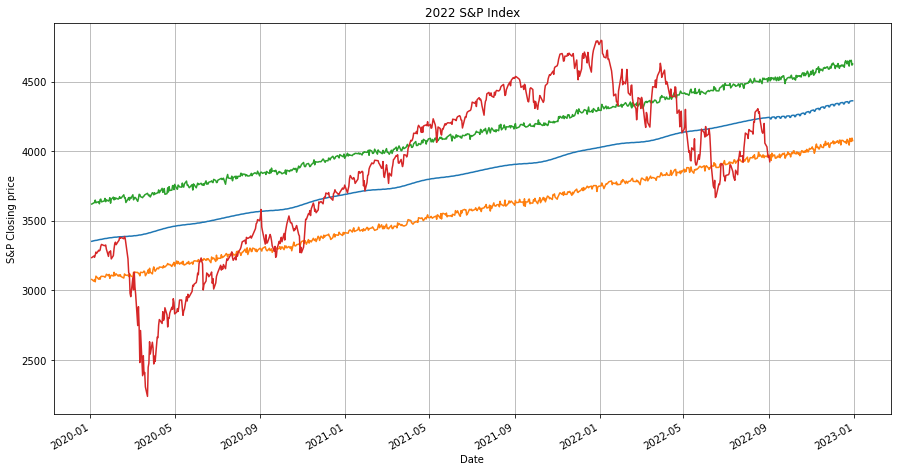

In [196]:
plt.plot(thisyear[['yhat','yhat_lower','yhat_upper']])
#Zooming in

ax = SP.loc['2020-01-03':,'S&P_Close'].plot(linestyle='-',figsize=(15,8), 
                                                        title="2022 S&P Index", grid=True)
ax.set_xlabel('Date')
ax.set_ylabel('S&P Closing price')


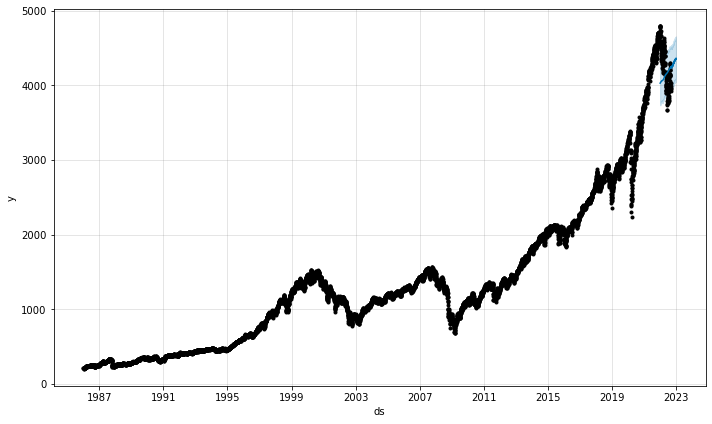

In [165]:
fig = model.plot(thisyear)